In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
plt.style.use('dark_background')

In [63]:
def generate_Pij(grid_size,action): #[-1:up,+1:down][1:right,-1:left]
    P_ij=np.zeros((10,10,100))
    for i in range(grid_size):
        for j in range(grid_size):
            P_ij_temp=np.zeros((grid_size+2,grid_size+2))
            #for k in range(grid_size):
                #for l in range(grid_size):
            P_ij_temp[int(i+1+action[i][j][0])][int(j+1+action[i][j][1])]=0.8
            P_ij_temp[int(i+1+int(not (action[i][j][0])))][int(j+1+int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[int(i+1-action[i][j][0])][int(j+1-action[i][j][1])]=0.2/3
            P_ij_temp[int(i+1-int(not (action[i][j][0])))][int(j+1-int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[1,:]+=P_ij_temp[0,:]
            P_ij_temp[:,1]+=P_ij_temp[:,0]
            P_ij_temp[-2,:]+=P_ij_temp[-1,:]
            P_ij_temp[:,-2]+=P_ij_temp[:,-1]
            P_ij_gridsize=P_ij_temp[1:-1,1:-1]
            #P_ij_gridsize=P_ij_gridsize.reshape(grid_size*grid_size)
            P_ij[:,:,grid_size*i+j]=P_ij_gridsize
    return P_ij

grid_size=10
niter=100
up_action=np.zeros((grid_size,grid_size,2))
up_action[:,:,0]=-1
up_action[:,:,1]=0
up_P_ij=generate_Pij(10,up_action.astype(int)) 

down_action=np.zeros((grid_size,grid_size,2))
down_action[:,:,0]=1
down_action[:,:,1]=0
down_P_ij=generate_Pij(10,down_action.astype(int)) 

left_action=np.zeros((grid_size,grid_size,2))
left_action[:,:,0]=0
left_action[:,:,1]=-1
left_P_ij=generate_Pij(10,left_action.astype(int)) 

right_action=np.zeros((grid_size,grid_size,2))
right_action[:,:,0]=0
right_action[:,:,1]=1
right_P_ij=generate_Pij(10,right_action.astype(int)) 
#######################
goal=9
in_gr=90 # coordinate of Gray wormhole IN when grid is reshaped from 10 x 10 to 100
in_or=7 # coordinate of Orange wormhole IN when grid is reshaped from 10 x 10 to 100

# coordinates of Gray wormhole OUT when grid is reshaped from 10 x 10 to 100
out_gr_1=32
out_gr_2=42
out_gr_3=52
out_gr_4=62
# coordinate of Orange wormhole OUT when grid is reshaped from 10 x 10 to 100
out_or_1=87

g=np.zeros(10*10)
g[goal]=10
g=np.reshape(g,(100,1))
J=np.zeros((100,1))
alpha=0.7


J_arr=[]
action_arr=[]

J_up=np.zeros(10*10)
J_down=np.zeros(10*10)
J_right=np.zeros(10*10)
J_left=np.zeros(10*10)

for i in range(niter):


    for state in range(100):
        up=np.sum(g*np.reshape(up_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(up_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        down=np.sum(g*np.reshape(down_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(down_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        right=np.sum(g*np.reshape(right_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(right_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        left=np.sum(g*np.reshape(left_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(left_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        J_up[state]=up
        J_down[state]=down
        J_right[state]=right
        J_left[state]=left

    J=np.vstack((J_up,J_down))
    J=np.vstack((J,J_right))
    J=np.vstack((J,J_left))
    act=np.argmax(J,axis=0) # up:0 down:1 right:2 left:3
    J=np.max(J,axis=0)


    J[9]=0 #goal cost is always 0

    # Gray Wormholes
    gray_wormhole_arr=[J[out_gr_1],J[out_gr_2],J[out_gr_3],J[out_gr_4]]
    J[in_gr]=np.random.choice(gray_wormhole_arr,1,p=[1/4,1/4,1/4,1/4]) 

    #Orange Wormhole
    J[in_or]=J[out_or_1]

    #Terminal State
    J[goal]=0
    # Because for Gray wormhole IN we have 0.25 probab of getting in one of the OUT
    J_arr.append(J)
    action_arr.append(act)

In [64]:
import pandas as pd
df=pd.DataFrame(np.reshape(act,(10,10)))
df1=pd.DataFrame(np.reshape(J,(10,10)))

In [65]:
df1

,0,1,2,3,4,5,6,7,8,9
0,0.102055,0.154759,0.238554,0.366984,0.562796,0.859859,1.294203,0.171184,8.681409,0.000000
1,0.125668,0.196804,0.314754,0.504853,0.811819,1.309058,2.117307,3.437173,5.749021,8.947621
2,0.103507,0.159760,0.251131,0.394711,0.619768,0.971887,1.521526,2.376963,3.703275,5.609526
3,0.071721,0.109540,0.170346,0.264883,0.411577,0.639015,0.991374,1.536915,2.381153,3.519870
4,0.047164,0.071643,0.111003,0.172072,0.266683,0.413230,0.640205,0.991734,1.528613,2.210445
5,0.031052,0.046417,0.071773,0.111174,0.172221,0.266785,0.413262,0.639631,0.979986,1.389181
6,0.020876,0.030210,0.046399,0.071786,0.111184,0.172224,0.266739,0.412324,0.627540,0.873655
7,0.058885,0.020475,0.030222,0.046405,0.071793,0.111185,0.172149,0.265658,0.401460,0.549806
8,0.102040,0.062557,0.020490,0.030293,0.046525,0.071890,0.111192,0.171184,0.256777,0.346428
9,0.046399,0.102040,0.058905,0.021323,0.031828,0.048443,0.073814,0.112355,0.167229,0.222577


In [21]:
import pandas as pd
df=pd.DataFrame(np.reshape())

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 3, 2, 2, 2, 0, 0, 0, 0, 1, 3,
       3, 3, 2, 2, 2, 0, 0, 0])

In [26]:
arrow={0:'↑',1:'↓',2:'➜',3:'←'}

# to print the arrows pointing along the optimal actions in that state
arrow_arr=[]
for i in range(len(act)):
    arrow_arr.append(arrow[act[i]])
    
import pandas as pd
df=pd.DataFrame(np.reshape(arrow_arr,(10,10)))

In [27]:
df

,0,1,2,3,4,5,6,7,8,9
0,➜,➜,➜,➜,➜,↓,↓,➜,➜,↑
1,➜,➜,➜,➜,➜,➜,➜,➜,➜,↑
2,➜,➜,➜,➜,➜,➜,➜,➜,↑,↑
3,➜,➜,➜,➜,➜,➜,➜,➜,↑,↑
4,↑,➜,➜,➜,➜,➜,➜,↑,↑,↑
5,↑,➜,➜,➜,➜,➜,↑,↑,↑,↑
6,↓,➜,➜,➜,➜,↑,↑,↑,↑,↑
7,↓,↓,➜,➜,➜,↑,↑,↑,↑,↑
8,↓,↓,←,➜,➜,➜,↑,↑,↑,↑
9,↓,←,←,←,➜,➜,➜,↑,↑,↑


In [69]:
niter=150
grid_size=10
alpha=0.7
PI=np.zeros((grid_size,grid_size,4)) #initialise with all UP's
goal=9
in_gr=90 # coordinate of Gray wormhole IN when grid is reshaped from 10 x 10 to 100
in_or=7 # coordinate of Orange wormhole IN when grid is reshaped from 10 x 10 to 100

# coordinates of Gray wormhole OUT when grid is reshaped from 10 x 10 to 100
out_gr_1=32
out_gr_2=42
out_gr_3=52
out_gr_4=62
# coordinate of Orange wormhole OUT when grid is reshaped from 10 x 10 to 100
out_or_1=87

def generate_Pij(grid_size,action): #[-1:up,+1:down][1:right,-1:left]
    # generates the transition probability matrix for each of the state given an action
    P_ij=np.zeros((10,10,100))
    for i in range(grid_size):
        for j in range(grid_size):
            P_ij_temp=np.zeros((grid_size+2,grid_size+2))
            #for k in range(grid_size):
                #for l in range(grid_size):
            P_ij_temp[int(i+1+action[i][j][0])][int(j+1+action[i][j][1])]=0.8
            P_ij_temp[int(i+1+int(not (action[i][j][0])))][int(j+1+int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[int(i+1-action[i][j][0])][int(j+1-action[i][j][1])]=0.2/3
            P_ij_temp[int(i+1-int(not (action[i][j][0])))][int(j+1-int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[1,:]+=P_ij_temp[0,:]
            P_ij_temp[:,1]+=P_ij_temp[:,0]
            P_ij_temp[-2,:]+=P_ij_temp[-1,:]
            P_ij_temp[:,-2]+=P_ij_temp[:,-1]
            P_ij_gridsize=P_ij_temp[1:-1,1:-1]
            #P_ij_gridsize=P_ij_gridsize.reshape(grid_size*grid_size)
            P_ij[:,:,grid_size*i+j]=P_ij_gridsize
    return P_ij
# initialise all actions as UP ie [-1,0] for all 100 states
action=np.zeros((grid_size,grid_size,2))
action[:,:,0]=-1
action[:,:,1]=0
#generate_Pij(10,action.astype(int)) 

# single stage cost
g=np.zeros(grid_size*grid_size)
g[goal]=10

up_action=np.zeros((grid_size,grid_size,2))
up_action[:,:,0]=-1
up_action[:,:,1]=0
up_P_ij=generate_Pij(10,up_action.astype(int)) 

down_action=np.zeros((grid_size,grid_size,2))
down_action[:,:,0]=1
down_action[:,:,1]=0
down_P_ij=generate_Pij(10,down_action.astype(int)) 

left_action=np.zeros((grid_size,grid_size,2))
left_action[:,:,0]=0
left_action[:,:,1]=-1
left_P_ij=generate_Pij(10,left_action.astype(int)) 

right_action=np.zeros((grid_size,grid_size,2))
right_action[:,:,0]=0
right_action[:,:,1]=1
right_P_ij=generate_Pij(10,right_action.astype(int)) 

P_ij=np.zeros((grid_size*grid_size,grid_size*grid_size))
for i in tqdm(range(niter)):
    
    
    generated_P_ij=generate_Pij(grid_size,action.astype(int))

    for k in range(grid_size*grid_size):
        P_ij[k,:]=np.reshape(generated_P_ij[:,:,k],(grid_size*grid_size))

    # solving the linear equations ie applying T_pi operator
    IP=np.linalg.inv(np.identity(grid_size*grid_size)-alpha*P_ij) #(I-alpha*P_ij)
    g_pi=np.dot(P_ij,g)
    g_pi[goal]=0
    J=np.dot(IP,g_pi)

    # Gray Wormholes
    gray_wormhole_arr=[J[out_gr_1],J[out_gr_2],J[out_gr_3],J[out_gr_4]]
    J[in_gr]=np.random.choice(gray_wormhole_arr,1,p=[1/4,1/4,1/4,1/4]) 

    #Orange Wormhole
    J[in_or]=J[out_or_1]

    #Terminal State
    J[goal]=0

    # Applying T operator
    TJ=np.zeros(grid_size*grid_size)
    T_action_up_down=np.zeros(grid_size*grid_size) # to store up down actions
    T_action_right_left=np.zeros(grid_size*grid_size) # to store right left actions
    new_action=np.zeros((grid_size,grid_size,2))
    for state in range(grid_size*grid_size):

        up=np.sum(g*np.reshape(up_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(up_P_ij[:,:,state],(grid_size**2))*J)
        down=np.sum(g*np.reshape(down_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(down_P_ij[:,:,state],(grid_size**2))*J)
        right=np.sum(g*np.reshape(right_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(right_P_ij[:,:,state],(grid_size**2))*J)
        left=np.sum(g*np.reshape(left_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(left_P_ij[:,:,state],(grid_size**2))*J)

        # min over actions
        TJ_temp=np.max([up,down,right,left])
        TJ[state]=TJ_temp
        min_action=np.argmax([up,down,right,left])

        if min_action==0: # up action
            T_action_up_down[state]=-1
            T_action_right_left[state]=0
        elif min_action==1: # down action
            T_action_up_down[state]=1
            T_action_right_left[state]=0
        elif min_action==2: # right action
            T_action_up_down[state]=0
            T_action_right_left[state]=1
        elif min_action==3: # left action
            T_action_up_down[state]=0
            T_action_right_left[state]=-1

    new_action[:,:,0]=np.reshape(T_action_up_down,(grid_size,grid_size))
    new_action[:,:,1]=np.reshape(T_action_right_left,(grid_size,grid_size))
    if np.array_equal(J,TJ):
        print('Converged within %d iterations'%i)
        print('Breaking')
        break
        pass
    action=new_action #update the action



100%|██████████| 150/150 [00:03<00:00, 46.19it/s]


In [58]:
TJ

array([ 0.14534166,  0.2217795 ,  0.34428468,  0.53385917,  0.82611751,
        1.27523766,  1.66981602,  6.18759675,  8.81628265,  9.64744285,
        0.16242675,  0.25388056,  0.40515466,  0.64828545,  1.03968951,
        1.67160831,  2.69510944,  4.06568861,  6.7837243 ,  9.11465068,
        0.12623813,  0.19423561,  0.3042949 ,  0.47654317,  0.74535827,
        1.16393761,  1.81391141,  2.81967332,  4.36910936,  6.59063746,
        0.08561057,  0.1305341 ,  0.20269677,  0.3147598 ,  0.48847882,
        0.75761676,  1.17440343,  1.81967828,  2.80876957,  4.13607887,
        0.05625436,  0.08495182,  0.13155554,  0.20386716,  0.31588403,
        0.48938733,  0.75812018,  1.1738532 ,  1.80284985,  2.59776351,
        0.03691753,  0.05494108,  0.08499278,  0.1316584 ,  0.2039495 ,
        0.31592844,  0.48935073,  0.75688777,  1.15564524,  1.63280125,
        0.02417908,  0.03552611,  0.05487655,  0.08499737,  0.13166271,
        0.20394702,  0.31582876,  0.48778937,  0.73993927,  1.02

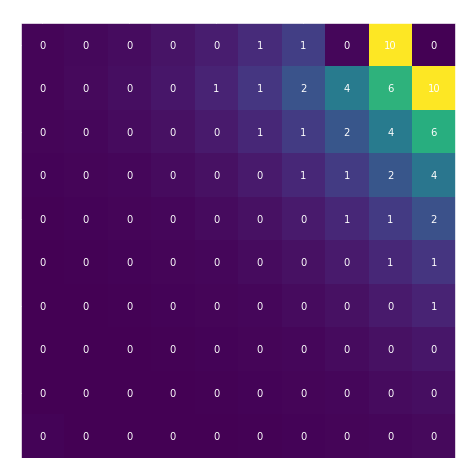

In [70]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(J,(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = int(np.floor(JN[j,i]))
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.show()

In [59]:
action.shape

(10, 10, 2)

In [62]:
def create_action_matrix(action):
    arrow={0:'↑',1:'➜',2:'↓',3:'←'}
    arrow_arr=[]
    for i in range(10):
        for j in range(10):
            if action[i,j,0]==-1: # up
                arrow_arr.append(arrow[0])
            elif action[i,j,0]==1: #down
                arrow_arr.append(arrow[2])
            elif action[i,j,1]==-1: #left
                arrow_arr.append(arrow[3])
            elif action[i,j,1]==1: #right
                arrow_arr.append(arrow[1])
    return (np.reshape(arrow_arr,(10,10)))

create_action_matrix(action)

,0,1,2,3,4,5,6,7,8,9
0,➜,➜,➜,➜,➜,➜,↓,➜,➜,↑
1,➜,➜,➜,➜,➜,➜,➜,➜,➜,↑
2,➜,➜,➜,➜,➜,➜,➜,➜,↑,↑
3,➜,➜,➜,➜,➜,➜,➜,↑,↑,↑
4,↑,➜,➜,➜,➜,➜,↑,↑,↑,↑
5,↑,➜,➜,➜,➜,↑,↑,↑,↑,↑
6,↑,↑,➜,➜,↑,↑,↑,↑,↑,↑
7,↑,↑,➜,➜,↑,↑,↑,↑,↑,↑
8,↓,➜,➜,➜,➜,↑,↑,↑,↑,↑
9,↓,←,➜,➜,➜,➜,➜,↑,↑,↑
